In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv") 

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,label,text
0,1,Great mobile app with nice reward program. Mak...
1,2,Really fast and polite. Definitely recommend. ...
2,2,"This place is always amazing, friendly staff a..."
3,1,We did a Wine 101 class on a Friday night. Coo...
4,1,I am rounding up because I think this place ma...


In [4]:
df.dtypes

label    object
text     object
dtype: object

In [5]:
df.describe()

,label,text
count,400001,400000
unique,7,399958
top,2,BASELINE and GREENFIELD location SUCKS!!! I gu...
freq,164201,2


In [6]:
df["label"].unique()

array([1, 2, 0, '1', '2', '0',
       'My husband and I had not purchased a home before and we definitely needed some hand holding. They were patient and professional. We got our dream home and the entire experience was awesome! Thank you so much ladies for a job well done!'],
      dtype=object)

In [7]:
df.loc[df["label"] == 'My husband and I had not purchased a home before and we definitely needed some hand holding. They were patient and professional. We got our dream home and the entire experience was awesome! Thank you so much ladies for a job well done!']

,label,text
273514,My husband and I had not purchased a home befo...,NaN


In [8]:
df.drop(df.index[273514], inplace = True)

In [9]:
df["label"] = pd.to_numeric(df["label"].values)

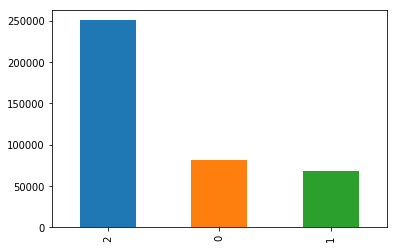

In [10]:
a = df['label'].value_counts()#.plot.bar()
a.plot.bar()

In [11]:
df["label"].value_counts(dropna = False)

2    250535
0     81300
1     68165
Name: label, dtype: int64

In [130]:
df.var()

label    0.650586
dtype: float64

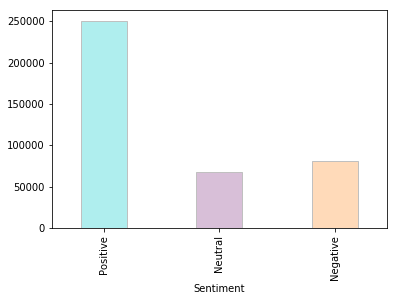

In [159]:
df = pd.DataFrame({'Sentiment':['Positive', 'Neutral', 'Negative'], 'val':[250535, 68165, 81300]})
ax = df.plot.bar(x='Sentiment', y='val' , legend = False, align="center", ec="silver", width=0.4, color = ["paleturquoise","thistle","peachpuff"])


Text(1.83,67300,'81300')

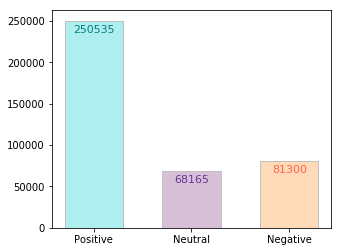

In [243]:
x = ['Positive', 'Neutral', 'Negative']
y = [250535, 68165, 81300]
plt.figure(figsize=(5,4))

plt.bar(x, y,   ec="silver", align="center",width=0.6,color = ["paleturquoise","thistle","peachpuff"])


plt.text(0-0.21,250535-14000, str(250535),fontsize=11,color="teal")
plt.text(1-0.175,68165-14000, str(68165),fontsize=11,color="rebeccapurple")
plt.text(2-0.17,81300-14000, str(81300),fontsize=11,color="tomato")

In [28]:
!pip install  langdetect 


  Created wheel for langdetect: filename=langdetect-1.0.8-py3-none-any.whl size=992043 sha256=21c849d8660c3b11fa6f1455132b7a7b6778d010a156b2808d7c0e17c8feda81
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\53\88\5d\b239dc55d773b01fdd2059606b1a8f4b64548848b8f6e381c3
Successfully built langdetect


You should consider upgrading via the 'c:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
detect("voice is best but aap baar singer ho kya pichhe toh khali bear whiskey rum aur glass dikhai de raha ")

'en'

In [11]:
language.Language("en",7)

en:7

In [4]:
detect("Hi tum kse ho?")

'et'

In [1]:
from langdetect import detect, language

In [27]:
df.shape

(400000, 2)

In [ ]:
for i in range(df.shape[0]):
    

In [32]:
import tqdm

In [34]:
data_eng = pd.DataFrame(columns=["senti", "text"])
data_other = pd.DataFrame(columns=["senti", "text", "lang"])

In [46]:
# data_eng.append({"senti":1,"text":"helllllllo","lang":"en"}, ignore_index=True)

,senti,text,lang
0,1,helllllllo,en


In [39]:
import time

In [53]:
data = df.sample(11000)

In [54]:
!pip install re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
You should consider upgrading via the 'c:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [55]:
import re

In [96]:
data_eng11 = pd.DataFrame(columns=["senti", "text"])
data_other11 = pd.DataFrame(columns=["senti", "text", "lang"])

In [97]:
for i in tqdm.tqdm(df.index):
    a = detect(df["text"][i])
    if(a == "en"):
        te = df["text"][i]
        te = re.sub(r'[^\w\s]', "", te).lower()
        data_eng11 = data_eng11.append({"senti": df["label"][i],
                        "text" : te}, ignore_index = True)
    else:
        data_other11 = data_other11.append({"senti": df["label"][i],
                         "text" : df["text"][i],
                         "lang" : a}, ignore_index = True)
    

100%|████████████████████████████████████████████████████████████████████████| 400000/400000 [4:34:01<00:00, 24.33it/s]


In [99]:
data_eng11.shape

(395931, 2)

In [100]:
data_other11.shape

(4069, 3)

In [101]:
data_eng11.to_csv("English_data.csv", index = False)

In [102]:
data_other11.to_csv("Other_data.csv", index = False)

In [106]:
data_eng11.head()

,senti,text
0,1,great mobile app with nice reward program make...
1,2,really fast and polite definitely recommend al...
2,2,this place is always amazing friendly staff an...
3,1,we did a wine 101 class on a friday night cool...
4,1,i am rounding up because i think this place ma...


In [138]:
data_eng11["senti"].value_counts()

2    248074
0     80818
1     67039
Name: senti, dtype: int64

In [140]:
data_eng11[data_eng11["senti"] == 0].sample(20)

,senti,text
273236,0,although the hotel has a new and modern feel t...
45206,0,this place is terrible extremely unprofession...
288218,0,why does this location allow people to stand o...
159458,0,damn d i loved you oh so much perfect environm...
159945,0,not coming back \n\nstopped by for their all y...
394082,0,do not move here the people in the office are ...
243452,0,i only yelp when i receive terrible service i ...
323122,0,ive come to the one on cheyenne and durango ...
13104,0,this was a very disappointing dinner we were ...
304223,0,closed i wanted to try this place i planned an...


In [178]:
equaldata = pd.DataFrame(columns=["senti", "text"])
equaldata = equaldata.append(data_eng11[data_eng11["senti"] == 0].sample(30000))
print("Negative Done!!!!!")
equaldata = equaldata.append(data_eng11[data_eng11["senti"] == 1].sample(30000))
print("Neutral Done!!!!!")
equaldata = equaldata.append(data_eng11[data_eng11["senti"] == 2].sample(30000))
print("Positive Done!!!!!")
equaldata = equaldata.sample(frac = 1)
print("Total Done!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

Negative Done!!!!!
Neutral Done!!!!!
Positive Done!!!!!
Total Done!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [179]:
equaldata.head()

,senti,text
155975,0,my food was terrible ordered chicken nuggets a...
217221,2,i may not have very much hair on my head but i...
211192,1,ematei is a restaurant that i have been going ...
115307,0,i went to this place to get a checkup for my b...
293698,0,this mcdonalds has been operating at this loca...


In [180]:
equaldata.to_csv("English_data90k.csv", index = False)

In [104]:
a = pd.read_csv("Other_data.csv")

In [105]:
a.head()

,senti,text,lang
0,0,Am 07.08.2014 war ich mit 5 Kollegen mittags i...,de
1,1,Nachdem wir jetzt das dritte Mal vor der Türe ...,de
2,1,¿La Eiffel Tower en Las Vegas?¿posta?¿es eso p...,es
3,2,Seit vier Jahren besuchen wir nun regelmäßig d...,de
4,2,Der Schlachthof fällt angenehm auf in der Essl...,de


In [3]:
data_eng = pd.read_csv("English_data90k.csv")

In [4]:
data_eng.head()

,senti,text
0,1,pretty awesome place it was neat being within ...
1,0,the people who gave this place one star were r...
2,0,wow this place is pure evil i went here to att...
3,2,the tea here is delicious i got rose tea the f...
4,0,dissapointedi was waiting for the chicken frie...


In [7]:
list(map(len,data_eng["text"])).index(4913)

14400

In [195]:
from nltk.corpus import stopwords

In [196]:
stopWords = set(stopwords.words('english'))

In [203]:
def removestop
for i in data_eng["text"][13866].split():
    if(i not in stopWords):
        k+=i+" "

la kitchen boasts one best shanghai restaurants markham area located newer plaza behind first markham mall restaurant offers variety shangahis best dishes two friends joined family three establishment check see didnt really reservations going place saturday evening fortunate given seat right away restaurant 25 30 tables every table occupied minutes arrival lineup heading door checking menu decided four six dishes would trick feeding five us first item ordered really one appetizers vegetarian goose 599 basically bean curd wrapped around bamboo shoots tofu many vegetarians love dish purity simpleness personally im vegetarian found neither really liking hating tasteless dish really taste little salt dish told one healthier items next dish arrive probably absolute complete opposite first dish terms purity healthiness braised pork belly 1099 fatty salty one could ever meal probably one dishes healthy never present high cholesterol high blood pressure heart disease said many people still lov

In [205]:
len(k)

3015

In [206]:
len(data_eng["text"][13866])

4913